In [1]:
%matplotlib inline

import fockspy
from fockspy import fock_classes as fc


import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy import sparse
from scipy.sparse import coo_matrix
from scipy.sparse import coo_array
from scipy.sparse import identity
from scipy.sparse import diags

### Fock spaces initialization 

In [2]:
f1 = fc.fock_space(1,1, statistics = 'Bose')
f2 = fc.fock_space(7,14, statistics = 'Bose')
f = fc.fock_space_kron(f1,f2)


### Problem parameters

In [11]:
Es = 1
Eps = 1
h = 0.05

K = f.dimension
m = f.modes
a = f.annihilate
a_dag = f.create


psi0 = np.zeros(f.dimension, dtype = complex)
j1 = 0
psi0[j1]=1


dt = 0.01
tmax = 100

Q = a_dag[0]@a[0] 

### Hamiltonian building

### $ H = \varepsilon_{s}  a^{+}_{0} a_{0} + h a^{+}_{0} a_{1} + h a^{+}_{1} a_{0} + \sum\limits_{i} (\varepsilon a^{+}_{i} a_{i} + h a^{+}_{i+1} a_{i} + h a^{+}_{i} a_{i+1}) + \sigma_{x} \cdot f(t) $

In [9]:
#constant part of Hamiltonian
H0 = f.emptyH

H0 += Es*a_dag[0]@a[0] + h*a_dag[0]@a[1] + h*a[0]@a_dag[1]
for i in range(1,m-1):
    H0 += Eps*a_dag[i]@a[i] + h * a_dag[i+1]@a[i] + h * a_dag[i]@a[i+1]

#time related part of Hamiltonian
def func(t):
    return(0.1*np.cos(t))
def H(t):
    return (H0 + f.sigmax(0)*func(t))

### Evolve the system

In [10]:
%%time
occupation_of_qubit = fc.real_time_solver(psi0, dt, tmax, H, Q)

CPU times: total: 2h 54min 34s
Wall time: 43min 55s


### Visualize the results

C:\Users\mrsgm\AppData\Local\Temp\ipykernel_15660\2902288889.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


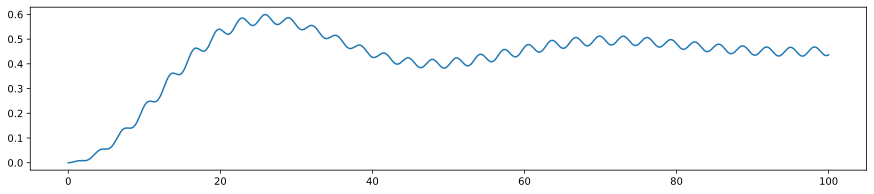

In [12]:
from numpy import loadtxt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


t=np.linspace(0,tmax,int(tmax/dt)+1)
plt.figure(figsize=(15,3))

plt.plot(t, occupation_of_qubit)

#plt.savefig('fock_clss_result3.svg')